# 1. Import Libraries & Load Data

In [82]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn.preprocessing import StandardScaler
from pandas.api.types import is_numeric_dtype, is_categorical_dtype

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

df = pd.read_csv("gfg_data.csv")
df.head()


,title,date_time,like,views,link,description
0,NIMCET 2026 | How To Prepare NIMCET 2026? | Bi...,"Jul 24, 2025",153,4.5K views,https://www.youtube.com//watch?v=Ho_PIAAVLlE,NIMCET Batch Link - https://www.geeksforgeeks....
1,NIMCET Roadmap | NIMCET 2026 Preparation | NIM...,"Jul 23, 2025",212,6.9K views,https://www.youtube.com//watch?v=cgeb6Gojoho,NIMCET Batch Link - https://www.geeksforgeeks....
2,AI Engineer Roadmap – How to Learn AI in 2025 ...,"Jul 22, 2025",987,36K views,https://www.youtube.com//watch?v=JagRXz_mTU8,Are you ready to launch your career as an AI E...
3,How to Score 9+ CGPA in College 🔥 Complete Roa...,"Jul 21, 2025",1.2K,23K views,https://www.youtube.com//watch?v=UttzVuaF-f0,"Want to score 9+ CGPA consistently in college,..."
4,Course Walkthrough - How to Utilize the Free C...,"Jul 17, 2025",409,10K views,https://www.youtube.com//watch?v=Dl-eEZlv_pk&p...,Bonus Rewards added: Get a chance to win free ...


# 2. Dataset Info :

In [5]:
# Shape of dataset
print("Shape:", df.shape)

# Data types & null values
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Quick summary of numeric-like columns
df.describe(include='all')


Shape: (2047, 6)

Data Types:
 title          object
date_time      object
like           object
views          object
link           object
description    object
dtype: object

Missing Values:
 title          15
date_time      15
like           15
views           0
link            0
description    15
dtype: int64


,title,date_time,like,views,link,description
count,2032,2032,2032,2047,2047,2032
unique,2022,1538,569,381,2047,1861
top,gOOGLE cASE of a given sentence | GeeksforGeeks,"Apr 1, 2016",40,12K views,https://www.youtube.com//watch?v=Ho_PIAAVLlE,Our courses : \nhttps://practice.geeksforgeeks...
freq,2,10,23,40,1,70


# 3. Data Cleaning

In [9]:
# Function to safely convert K/M values to numbers
def convert_to_number(x):
    if pd.isnull(x):
        return np.nan
    x = str(x).replace(" views", "").strip()  # Remove ' views'
    try:
        if "K" in x:
            return float(x.replace("K", "")) * 1000
        elif "M" in x:
            return float(x.replace("M", "")) * 1000000
        else:
            return float(x)  # If pure number
    except ValueError:
        return np.nan  # If not convertible, return NaN

# Apply to views & like columns
df['views'] = df['views'].apply(convert_to_number)
df['like'] = df['like'].apply(convert_to_number)

# Convert date_time to datetime
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')

# Fill missing values
df['title'] = df['title'].fillna("Unknown Title")
df['description'] = df['description'].fillna("No Description")
df['like'] = df['like'].fillna(0)


# 4. Duplicate Check



In [11]:
# Check & remove duplicates
print("Duplicates before:", df.duplicated(subset=['title', 'date_time']).sum())
df = df.drop_duplicates(subset=['title', 'date_time'])
print("Duplicates after:", df.duplicated(subset=['title', 'date_time']).sum())


Duplicates before: 14
Duplicates after: 0


# 5. Summary Insights



In [13]:
print("Total Videos:", df.shape[0])
print("Total Views:", int(df['views'].sum()))
print("Total Likes:", int(df['like'].sum()))
print("Average Views per Video:", int(df['views'].mean()))
print("Average Likes per Video:", int(df['like'].mean()))


Total Videos: 2033
Total Views: 80867859
Total Likes: 747239
Average Views per Video: 39797
Average Likes per Video: 367


# 6. Views & Likes Over Time

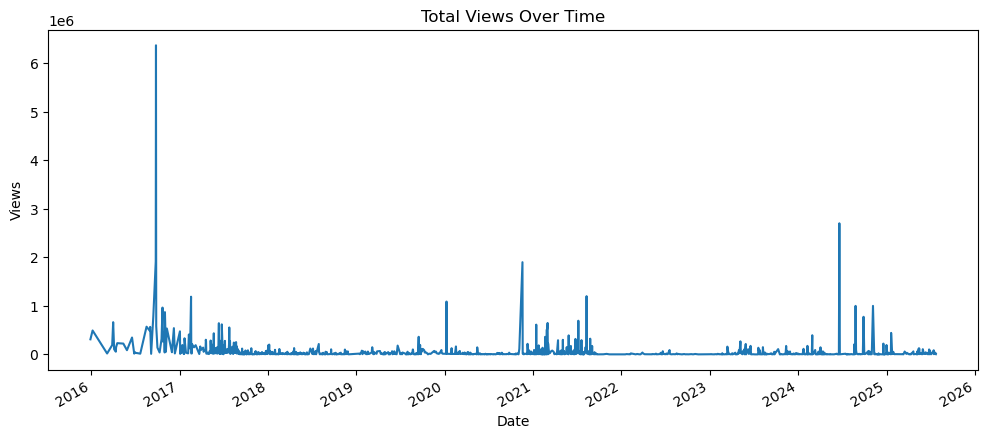

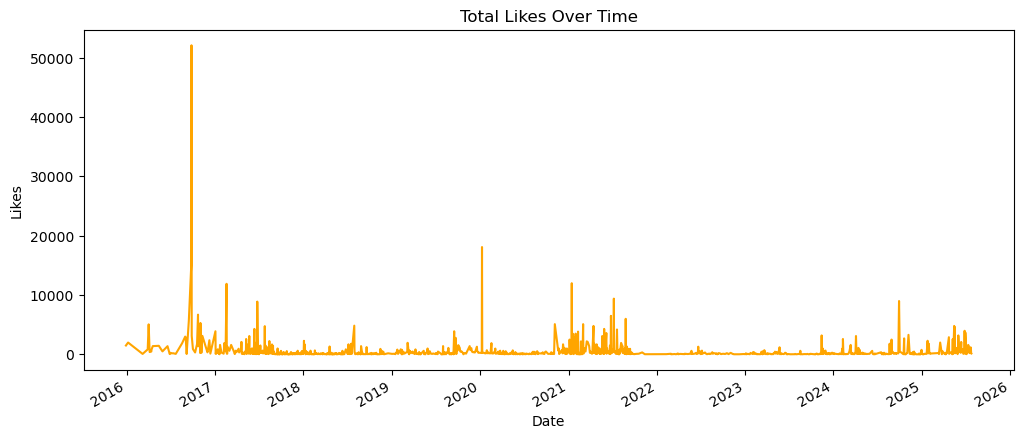

In [15]:
plt.figure(figsize=(12,5))
df.groupby('date_time')['views'].sum().plot()
plt.title("Total Views Over Time")
plt.xlabel("Date")
plt.ylabel("Views")
plt.show()

plt.figure(figsize=(12,5))
df.groupby('date_time')['like'].sum().plot(color='orange')
plt.title("Total Likes Over Time")
plt.xlabel("Date")
plt.ylabel("Likes")
plt.show()


# 7. Top 10 Most Viewed Videos

C:\Users\Infinix\AppData\Local\Temp\ipykernel_17008\2487339064.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='views', data=top_videos, palette='Blues_r')


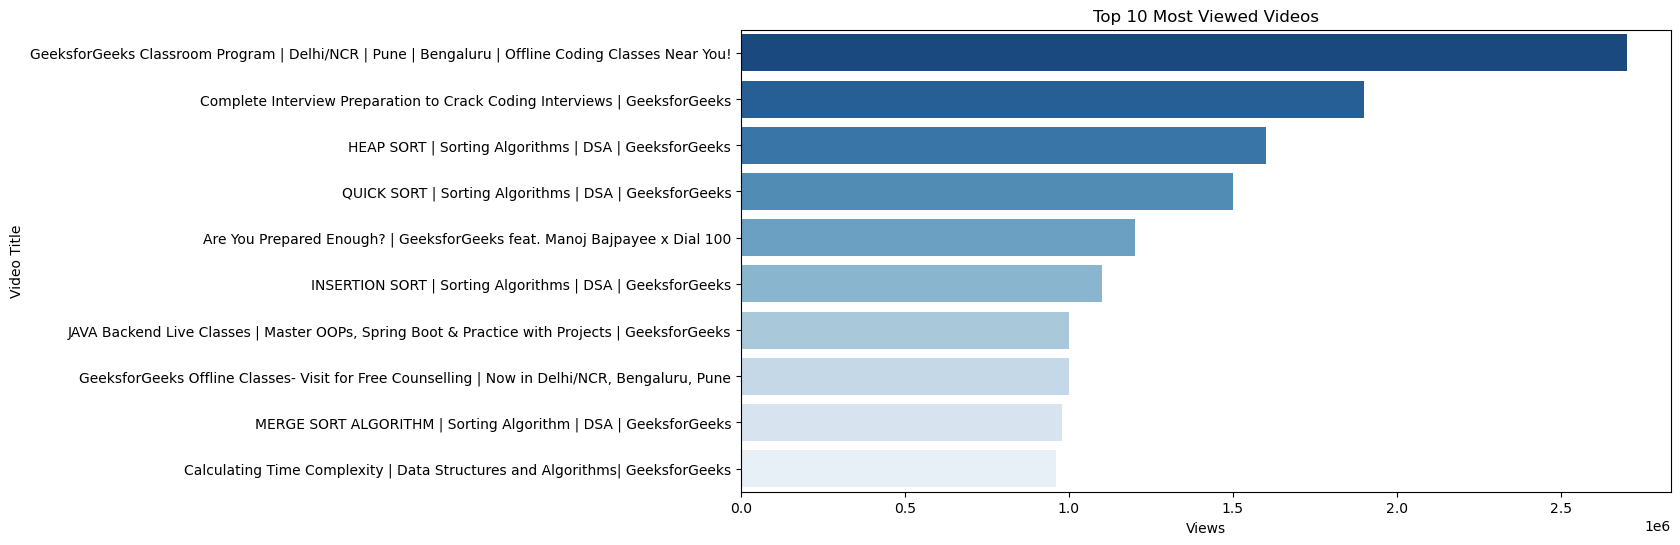

In [17]:
top_videos = df.sort_values(by='views', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(y='title', x='views', data=top_videos, palette='Blues_r')
plt.title("Top 10 Most Viewed Videos")
plt.xlabel("Views")
plt.ylabel("Video Title")
plt.show()


#  8. Top 10 Most Liked Videos

C:\Users\Infinix\AppData\Local\Temp\ipykernel_17008\912626355.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='like', data=top_liked, palette='Greens_r')


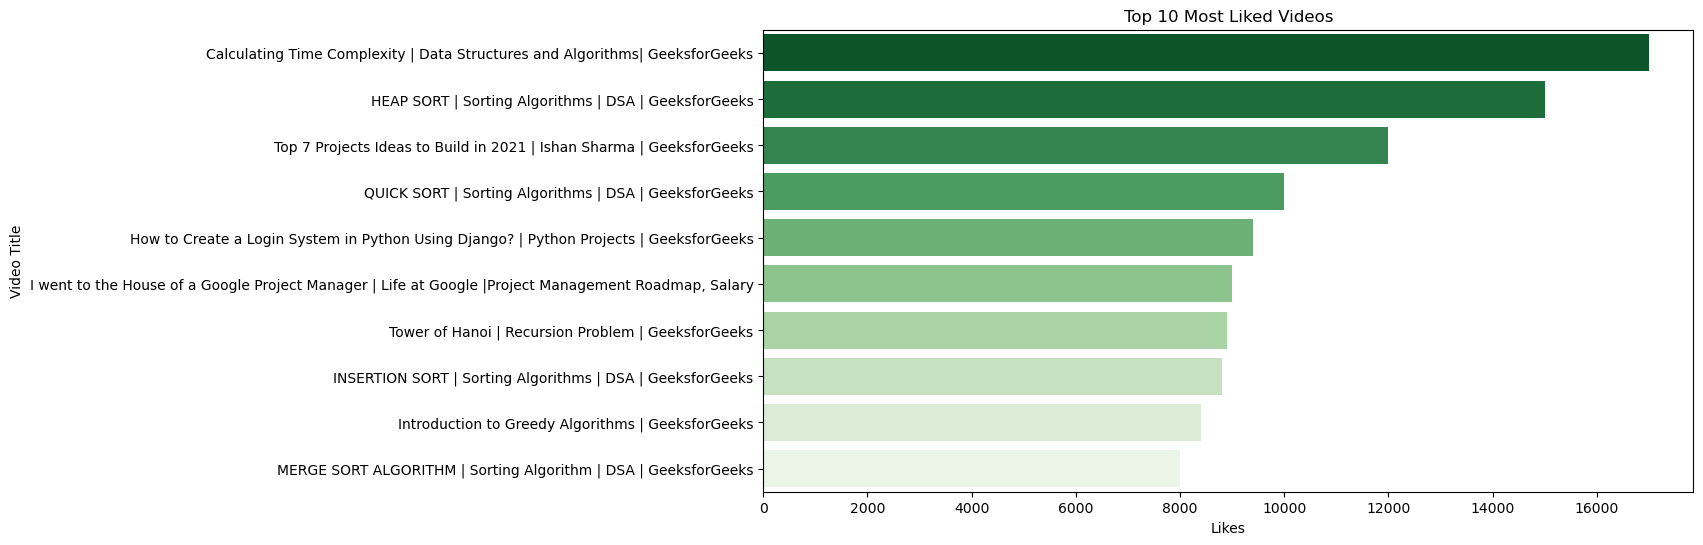

In [19]:
top_liked = df.sort_values(by='like', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(y='title', x='like', data=top_liked, palette='Greens_r')
plt.title("Top 10 Most Liked Videos")
plt.xlabel("Likes")
plt.ylabel("Video Title")
plt.show()


# 9. Upload Frequency by Month

C:\Users\Infinix\AppData\Local\Temp\ipykernel_17008\3201078323.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='count', data=monthly_uploads, palette='coolwarm')


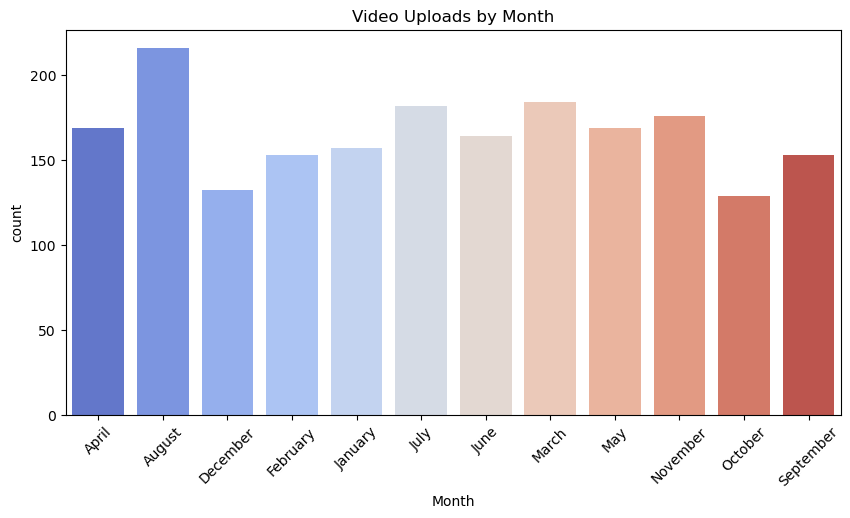

In [21]:
df['Month'] = df['date_time'].dt.month_name()
monthly_uploads = df.groupby('Month').size().reset_index(name='count')

plt.figure(figsize=(10,5))
sns.barplot(x='Month', y='count', data=monthly_uploads, palette='coolwarm')
plt.title("Video Uploads by Month")
plt.xticks(rotation=45)
plt.show()


# 10. Likes vs Views Relationship

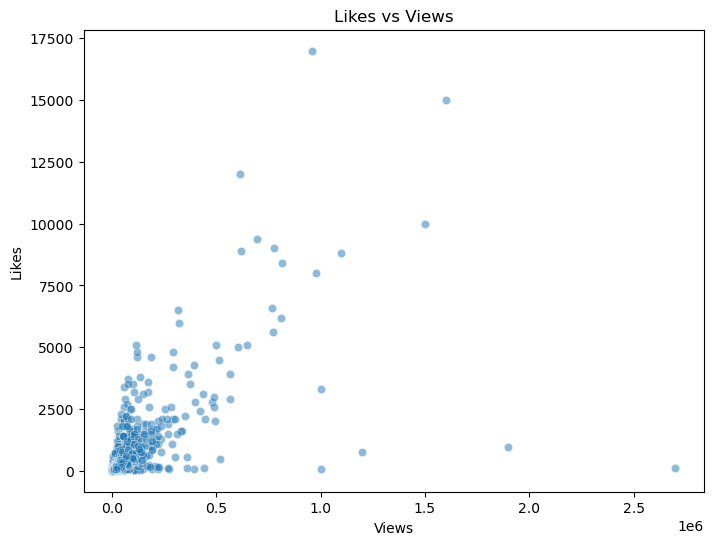

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='views', y='like', data=df, alpha=0.5)
plt.title("Likes vs Views")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.show()


# 11. Views & Likes Distribution

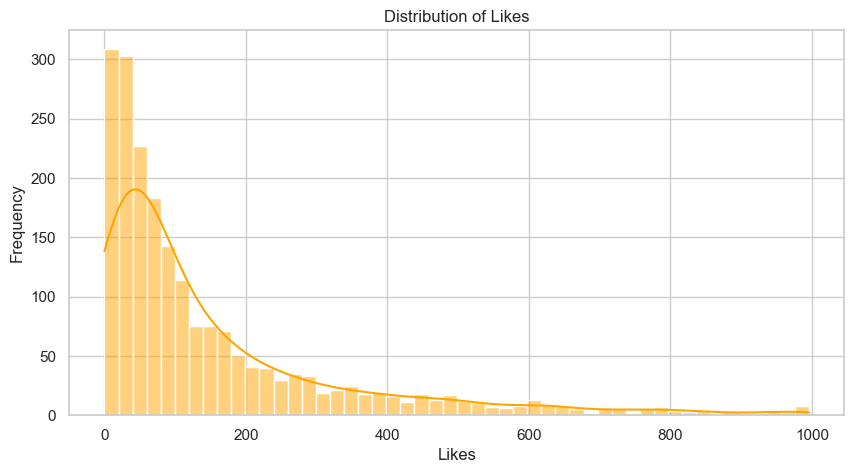

In [78]:
plt.figure(figsize=(10,5))
sns.histplot(df['like'], bins=50, kde=True, color='orange')
plt.title("Distribution of Likes")
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.show()


# 12. Views & Likes Over Time

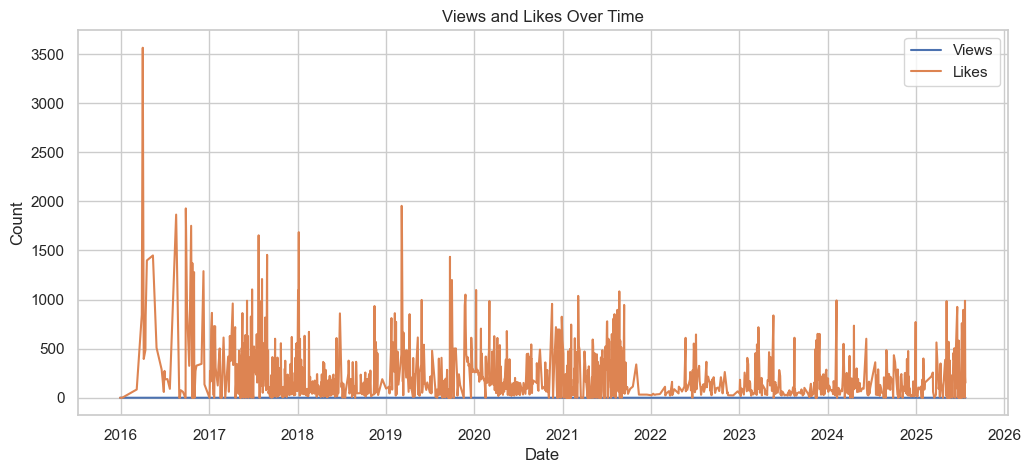

In [58]:
# Ensure date_time is in datetime format
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')

# Now group by date
df_time = df.groupby(df['date_time'].dt.date).agg({'views':'sum', 'like':'sum'}).reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(data=df_time, x='date_time', y='views', label='Views')
sns.lineplot(data=df_time, x='date_time', y='like', label='Likes')
plt.title("Views and Likes Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()


# 13. Top 10 Keywords in Titles

C:\Users\Infinix\AppData\Local\Temp\ipykernel_17008\3761936094.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_words_df, x='count', y='word', palette='viridis')


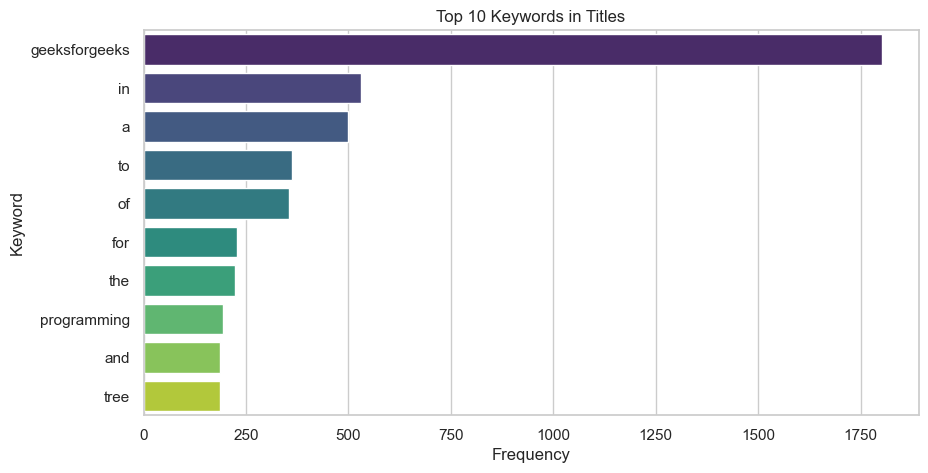

In [64]:
from collections import Counter
import re

# Drop NaNs in title or replace with empty string
df['title'] = df['title'].fillna('')

# Extract keywords from titles
all_words = []
for title in df['title']:
    words = re.findall(r'\b\w+\b', title.lower())  # tokenize
    all_words.extend(words)

word_counts = Counter(all_words)
top_words = word_counts.most_common(10)

# Dataframe for plotting
top_words_df = pd.DataFrame(top_words, columns=['word', 'count'])

plt.figure(figsize=(10,5))
sns.barplot(data=top_words_df, x='count', y='word', palette='viridis')
plt.title("Top 10 Keywords in Titles")
plt.xlabel("Frequency")
plt.ylabel("Keyword")
plt.show()


# 14. Posting Frequency

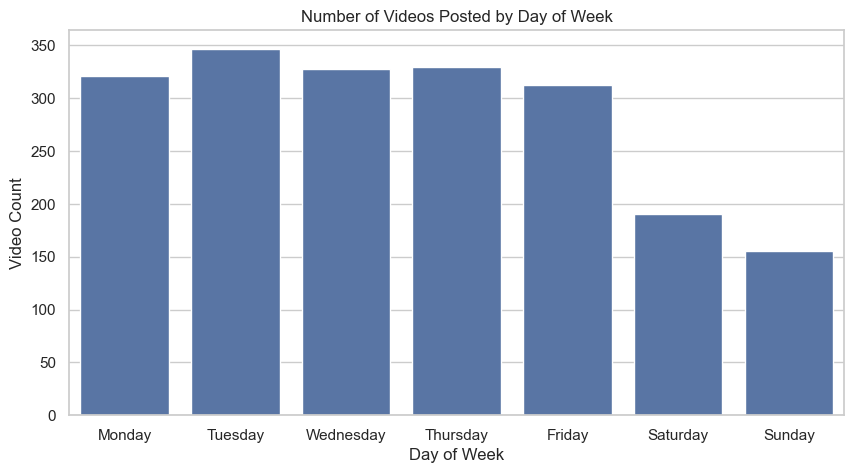

In [68]:
df['day_of_week'] = df['date_time'].dt.day_name()

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='day_of_week', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Number of Videos Posted by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Video Count")
plt.show()


In [88]:
df.to_csv("youtube_cleaned.csv", index=False)
